In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import ticker
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os
import time
from numba import njit
from scipy.optimize import curve_fit

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [3]:
LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)

gmt_awk_LS133 = OpenRootFile(LS133, gmt_features)
gmt_awk_LS263 = OpenRootFile(LS263, gmt_features)
gmt_awk_LS264 = OpenRootFile(LS264, gmt_features)
gmt_awk_LS306 = OpenRootFile(LS306, gmt_features)

bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

In [4]:
#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento muoni di GMT
nGmtMuons_LS133 = gmt_awk_LS133.nGmtMuons
nGmtMuons_LS263 = gmt_awk_LS263.nGmtMuons
nGmtMuons_LS264 = gmt_awk_LS264.nGmtMuons
nGmtMuons_LS306 = gmt_awk_LS306.nGmtMuons

nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [6]:
def BX_OPT(Gmt_Muons, Bmtf_Muons):

    BX_Matrix = [[] for _ in range(ONE_ORBIT_IN_BX)]
    
    for j in range(len(BX)):

      if nMuons[j] > 0:
        BX_Matrix[BX[j]].append([j, nMuons[j]])
    
    BX_Matrix = ak.Array(BX_Matrix)

    return BX_Matrix

In [7]:
'''BX_BMTF_LS133 = BX_OPT(BX_LS133, nBmtfMuons_LS133)
BX_GMT_LS133 = BX_OPT(BX_LS133, nGmtMuons_LS133)

BX_BMTF_LS263 = BX_OPT(BX_LS263, nBmtfMuons_LS263)
BX_GMT_LS263 = BX_OPT(BX_LS263, nGmtMuons_LS263)

BX_BMTF_LS264 = BX_OPT(BX_LS264, nBmtfMuons_LS264)
BX_GMT_LS264 = BX_OPT(BX_LS264, nGmtMuons_LS264)

BX_BMTF_LS306 = BX_OPT(BX_LS306, nBmtfMuons_LS306)
BX_GMT_LS306 = BX_OPT(BX_LS306, nGmtMuons_LS306)'''

In [8]:
#Salvataggio in file .parquet

'''ak.to_parquet(BX_BMTF_LS133, 'BX_BMTF_LS133.parquet')
ak.to_parquet(BX_GMT_LS133, 'BX_GMT_LS133.parquet')

ak.to_parquet(BX_BMTF_LS263, 'BX_BMTF_LS263.parquet')
ak.to_parquet(BX_GMT_LS263, 'BX_GMT_LS263.parquet')

ak.to_parquet(BX_BMTF_LS264, 'BX_BMTF_LS264.parquet')
ak.to_parquet(BX_GMT_LS264, 'BX_GMT_LS264.parquet')

ak.to_parquet(BX_BMTF_LS306, 'BX_BMTF_LS306.parquet')
ak.to_parquet(BX_GMT_LS306, 'BX_GMT_LS306.parquet')'''

  created_by: parquet-cpp-arrow version 14.0.2
  num_columns: 1
  num_rows: 3564
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [9]:
#----------------------------------------GMT_PHI--------------------------------------------------

GmtPhi_LS133 = gmt_awk_LS133.gmtPhi
GmtPhi_LS263 = gmt_awk_LS263.gmtPhi
GmtPhi_LS264 = gmt_awk_LS264.gmtPhi
GmtPhi_LS306 = gmt_awk_LS306.gmtPhi

GmtPhi_LS133 = ak.where(ak.num(GmtPhi_LS133) == 0, ak.Array([[0]]), GmtPhi_LS133)
GmtPhi_LS263 = ak.where(ak.num(GmtPhi_LS263) == 0, ak.Array([[0]]), GmtPhi_LS263)
GmtPhi_LS264 = ak.where(ak.num(GmtPhi_LS264) == 0, ak.Array([[0]]), GmtPhi_LS264)
GmtPhi_LS306 = ak.where(ak.num(GmtPhi_LS306) == 0, ak.Array([[0]]), GmtPhi_LS306)



#----------------------------------------GMT_ETA--------------------------------------------------

GmtEta_LS133 = gmt_awk_LS133.gmtEta
GmtEta_LS263 = gmt_awk_LS263.gmtEta
GmtEta_LS264 = gmt_awk_LS264.gmtEta
GmtEta_LS306 = gmt_awk_LS306.gmtEta

GmtEta_LS133 = ak.where(ak.num(GmtEta_LS133) == 0, ak.Array([[0]]), GmtEta_LS133)
GmtEta_LS263 = ak.where(ak.num(GmtEta_LS263) == 0, ak.Array([[0]]), GmtEta_LS263)
GmtEta_LS264 = ak.where(ak.num(GmtEta_LS264) == 0, ak.Array([[0]]), GmtEta_LS264)
GmtEta_LS306 = ak.where(ak.num(GmtEta_LS306) == 0, ak.Array([[0]]), GmtEta_LS306)



#----------------------------------------BMTF_ETA--------------------------------------------------

BmtfEta_LS133 = bmtf_awk_LS133.bmtfEta
BmtfEta_LS263 = bmtf_awk_LS263.bmtfEta
BmtfEta_LS264 = bmtf_awk_LS264.bmtfEta
BmtfEta_LS306 = bmtf_awk_LS306.bmtfEta

BmtfEta_LS133 = ak.where(ak.num(BmtfEta_LS133) == 0, ak.Array([[0]]), BmtfEta_LS133)
BmtfEta_LS263 = ak.where(ak.num(BmtfEta_LS263) == 0, ak.Array([[0]]), BmtfEta_LS263)
BmtfEta_LS264 = ak.where(ak.num(BmtfEta_LS264) == 0, ak.Array([[0]]), BmtfEta_LS264)
BmtfEta_LS306 = ak.where(ak.num(BmtfEta_LS306) == 0, ak.Array([[0]]), BmtfEta_LS306)



#----------------------------------------BMTF_PHI--------------------------------------------------

BmtfPhi_LS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhi_LS263 = bmtf_awk_LS263.bmtfPhi
BmtfPhi_LS264 = bmtf_awk_LS264.bmtfPhi
BmtfPhi_LS306 = bmtf_awk_LS306.bmtfPhi

BmtfPhi_LS133 = ak.where(ak.num(BmtfPhi_LS133) == 0, ak.Array([[0]]), BmtfPhi_LS133)
BmtfPhi_LS263 = ak.where(ak.num(BmtfPhi_LS263) == 0, ak.Array([[0]]), BmtfPhi_LS263)
BmtfPhi_LS264 = ak.where(ak.num(BmtfPhi_LS264) == 0, ak.Array([[0]]), BmtfPhi_LS264)
BmtfPhi_LS306 = ak.where(ak.num(BmtfPhi_LS306) == 0, ak.Array([[0]]), BmtfPhi_LS306)


In [10]:
def DeltaR(BmtfPhi, GmtPhi, BmtfEta, GmtEta):
  return np.sqrt((BmtfPhi - GmtPhi)**2 + (BmtfEta - GmtEta)**2)

def DeltaRDist(BX_BMTF, BX_GMT, BmtfPhi, GmtPhi, BmtfEta, GmtEta, use_Bmtf = True):

  DeltaDist = [[] for _ in range(ONE_ORBIT_IN_BX)]
  IndexMin = [[] for _ in range(ONE_ORBIT_IN_BX)]

  if use_Bmtf: 
    for i in range(ONE_ORBIT_IN_BX):

      NestedArrayDeltaR = []
      NestedArrayIndex = []

      BmtfPhiF, BmtfEtaF = ak.flatten(BmtfPhi[BX_BMTF[i, :, 0]]), ak.flatten(BmtfEta[BX_BMTF[i, :, 0]])
      GmtPhiF, GmtEtaF = ak.flatten(GmtPhi[BX_GMT[i, :, 0]]), ak.flatten(GmtEta[BX_GMT[i, :, 0]])

      for j in range(len(BmtfPhiF)):

        DeltaRTemp = DeltaR(BmtfPhiF[j], GmtPhiF[:], BmtfEtaF[j], GmtEtaF[:])

        minDeltaR = np.min(DeltaRTemp)
        indexTemp = np.argmin(DeltaRTemp)

        NestedArrayDeltaR.append(minDeltaR)
        NestedArrayIndex.append(indexTemp)

      DeltaDist[i].extend(NestedArrayDeltaR)
      IndexMin[i].extend(NestedArrayIndex)


  else:
    for i in range(ONE_ORBIT_IN_BX):

      NestedArrayDeltaR = []
      NestedArrayIndex = []

      BmtfPhiF, BmtfEtaF = ak.flatten(BmtfPhi[BX_BMTF[i, :, 0]]), ak.flatten(BmtfEta[BX_BMTF[i, :, 0]])
      GmtPhiF, GmtEtaF = ak.flatten(GmtPhi[BX_GMT[i, :, 0]]), ak.flatten(GmtEta[BX_GMT[i, :, 0]])

      for j in range(len(GmtPhiF)):
        DeltaRTemp = DeltaR(BmtfPhiF[:], GmtPhiF[j], BmtfEtaF[:], GmtEtaF[j])     

        minDeltaR = np.min(DeltaRTemp)
        indexTemp = np.argmin(DeltaRTemp)

        NestedArrayDeltaR.append(minDeltaR)
        NestedArrayIndex.append(indexTemp)

      DeltaDist[i].extend(NestedArrayDeltaR)
      IndexMin[i].extend(NestedArrayIndex)

  return ak.fill_none(ak.Array(DeltaDist), 0), ak.fill_none(ak.Array(IndexMin), 0)


In [11]:
#Primo metodo (use_Bmtf = True)

'''DeltaR_BMTF_LS133, IndexDist_BMTF_LS133 = DeltaRDist(BX_BMTF_LS133, BX_GMT_LS133, BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133, use_Bmtf = True)
DeltaR_BMTF_LS263, IndexDist_BMTF_LS263 = DeltaRDist(BX_BMTF_LS263, BX_GMT_LS263, BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263, use_Bmtf = True)
DeltaR_BMTF_LS264, IndexDist_BMTF_LS264 = DeltaRDist(BX_BMTF_LS264, BX_GMT_LS264, BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264, use_Bmtf = True)
DeltaR_BMTF_LS306, IndexDist_BMTF_LS306 = DeltaRDist(BX_BMTF_LS306, BX_GMT_LS306, BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306, use_Bmtf = True)'''

In [12]:
#Salvataggio primo metodo

'''ak.to_parquet(DeltaR_BMTF_LS133, 'DeltaR_BMTF_LS133.parquet')
ak.to_parquet(IndexDist_BMTF_LS133, 'IndexDist_BMTF_LS133.parquet')

ak.to_parquet(DeltaR_BMTF_LS263, 'DeltaR_BMTF_LS263.parquet')
ak.to_parquet(IndexDist_BMTF_LS263, 'IndexDist_BMTF_LS263.parquet')


ak.to_parquet(DeltaR_BMTF_LS264, 'DeltaR_BMTF_LS264.parquet')
ak.to_parquet(IndexDist_BMTF_LS264, 'IndexDist_BMTF_LS264.parquet')

ak.to_parquet(DeltaR_BMTF_LS306, 'DeltaR_BMTF_LS306.parquet')
ak.to_parquet(IndexDist_BMTF_LS306, 'IndexDist_BMTF_LS306.parquet')'''

  created_by: parquet-cpp-arrow version 14.0.2
  num_columns: 1
  num_rows: 3564
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [ ]:
#Secondo metodo (use_Bmtf = False)

DeltaR_GMT_LS133, IndexDist_GMT_LS133 = DeltaRDist(BX_BMTF_LS133, BX_GMT_LS133, BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133, use_Bmtf = False)
DeltaR_GMT_LS263, IndexDist_GMT_LS263 = DeltaRDist(BX_BMTF_LS263, BX_GMT_LS263, BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263, use_Bmtf = False)
DeltaR_GMT_LS264, IndexDist_GMT_LS264 = DeltaRDist(BX_BMTF_LS264, BX_GMT_LS264, BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264, use_Bmtf = False)
DeltaR_GMT_LS306, IndexDist_GMT_LS306 = DeltaRDist(BX_BMTF_LS306, BX_GMT_LS306, BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306, use_Bmtf = False)

In [ ]:
#Salvataggio secondo metodo

ak.to_parquet(DeltaR_GMT_LS133, 'DeltaR_GMT_LS133.parquet')
ak.to_parquet(IndexDist_GMT_LS133, 'IndexDist_GMT_LS133.parquet')

ak.to_parquet(DeltaR_GMT_LS263, 'DeltaR_GMT_LS263.parquet')
ak.to_parquet(IndexDist_GMT_LS263, 'IndexDist_GMT_LS263.parquet')


ak.to_parquet(DeltaR_GMT_LS264, 'DeltaR_GMT_LS264.parquet')
ak.to_parquet(IndexDist_GMT_LS264, 'IndexDist_GMT_LS264.parquet')

ak.to_parquet(DeltaR_GMT_LS306, 'DeltaR_GMT_LS306.parquet')
ak.to_parquet(IndexDist_GMT_LS306, 'IndexDist_GMT_LS306.parquet')

In [13]:
def Delta(BMTF, GMT):
  return BMTF - GMT

def Distribution(Index, BX_BMTF, BX_GMT, BmtfPhi, GmtPhi, BmtfEta, GmtEta, use_Bmtf = True):
  DistPhi = []
  DistEta = []

  if use_Bmtf:
    for i in range(ONE_ORBIT_IN_BX):

      BmtfPhiF, BmtfEtaF = ak.flatten(BmtfPhi[BX_BMTF[i, :, 0]]), ak.flatten(BmtfEta[BX_BMTF[i, :, 0]])
      GmtPhiF, GmtEtaF = ak.flatten(GmtPhi[BX_GMT[i, :, 0]]), ak.flatten(GmtEta[BX_GMT[i, :, 0]])

      for j in range(len(BmtfPhiF)):

        DeltaPhi = Delta(BmtfPhiF[j], GmtPhiF[Index[i, j]])
        DeltaEta = Delta(BmtfEtaF[j], GmtEtaF[Index[i, j]])


        DistPhi.append(DeltaPhi)
        DistEta.append(DeltaEta)

  else:
    for i in range(30, ONE_ORBIT_IN_BX):

      BmtfPhiF, BmtfEtaF = ak.flatten(BmtfPhi[BX_BMTF[i, :, 0]]), ak.flatten(BmtfEta[BX_BMTF[i, :, 0]])
      GmtPhiF, GmtEtaF = ak.flatten(GmtPhi[BX_GMT[i, :, 0]]), ak.flatten(GmtEta[BX_GMT[i, :, 0]])

      for j in range(len(GmtPhiF)):

        DeltaPhi = Delta(BmtfPhiF[Index[i, j]], GmtPhiF[j])
        DeltaEta = Delta(BmtfEtaF[Index[i, j]], GmtEtaF[j])


        DistPhi.append(DeltaPhi)
        DistEta.append(DeltaEta)
  
  return np.array(DistPhi), np.array(DistEta)

In [14]:
#Distribuzione Eta e Phi usando il primo metodo
'''DeltaPhi_BMTF_LS133, DeltaEta_BMTF_LS133 = Distribution(IndexDist_BMTF_LS133, BX_BMTF_LS133, BX_GMT_LS133, BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133, use_Bmtf = True)
DeltaPhi_BMTF_LS263, DeltaEta_BMTF_LS263 = Distribution(IndexDist_BMTF_LS263, BX_BMTF_LS263, BX_GMT_LS263, BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263, use_Bmtf = True)
DeltaPhi_BMTF_LS264, DeltaEta_BMTF_LS264 = Distribution(IndexDist_BMTF_LS264, BX_BMTF_LS264, BX_GMT_LS264, BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264, use_Bmtf = True)
DeltaPhi_BMTF_LS306, DeltaEta_BMTF_LS306 = Distribution(IndexDist_BMTF_LS306, BX_BMTF_LS306, BX_GMT_LS306, BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306, use_Bmtf = True)'''

In [16]:
#Salvataggio Distribuzione Eta e Phi usando il primo metodo
'''ak.to_parquet(DeltaPhi_BMTF_LS133, 'DeltaPhi_BMTF_LS133.parquet')
ak.to_parquet(DeltaEta_BMTF_LS133, 'DeltaEta_BMTF_LS133.parquet')

ak.to_parquet(DeltaPhi_BMTF_LS263, 'DeltaPhi_BMTF_LS263.parquet')
ak.to_parquet(DeltaEta_BMTF_LS263, 'DeltaEta_BMTF_LS263.parquet')


ak.to_parquet(DeltaPhi_BMTF_LS264, 'DeltaPhi_BMTF_LS264.parquet')
ak.to_parquet(DeltaEta_BMTF_LS264, 'DeltaEta_BMTF_LS264.parquet')

ak.to_parquet(DeltaPhi_BMTF_LS306, 'DeltaPhi_BMTF_LS306.parquet')
ak.to_parquet(DeltaEta_BMTF_LS306, 'DeltaEta_BMTF_LS306.parquet')'''

  created_by: parquet-cpp-arrow version 14.0.2
  num_columns: 1
  num_rows: 560018
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 0

In [ ]:
#Distribuzione Eta e Phi usando il secondo metodo

DeltaPhi_GMT_LS133, DeltaEta_GMT_LS133 = Distribution(IndexDist_GMT_LS133, BX_BMTF_LS133, BX_GMT_LS133, BmtfPhi_LS133, GmtPhi_LS133, BmtfEta_LS133, GmtEta_LS133, use_Bmtf = False)
DeltaPhi_GMT_LS263, DeltaEta_GMT_LS263 = Distribution(IndexDist_GMT_LS263, BX_BMTF_LS263, BX_GMT_LS263, BmtfPhi_LS263, GmtPhi_LS263, BmtfEta_LS263, GmtEta_LS263, use_Bmtf = False)
DeltaPhi_GMT_LS264, DeltaEta_GMT_LS264 = Distribution(IndexDist_GMT_LS264, BX_BMTF_LS264, BX_GMT_LS264, BmtfPhi_LS264, GmtPhi_LS264, BmtfEta_LS264, GmtEta_LS264, use_Bmtf = False)
DeltaPhi_GMT_LS306, DeltaEta_GMT_LS306 = Distribution(IndexDist_GMT_LS306, BX_BMTF_LS306, BX_GMT_LS306, BmtfPhi_LS306, GmtPhi_LS306, BmtfEta_LS306, GmtEta_LS306, use_Bmtf = False)


In [ ]:
#Salvataggio Distribuzione Eta e Phi usando il secondo metodo

ak.to_parquet(DeltaPhi_GMT_LS133, 'DeltaPhi_GMT_LS133.parquet')
ak.to_parquet(DeltaEta_GMT_LS133, 'DeltaEta_GMT_LS133.parquet')

ak.to_parquet(DeltaPhi_GMT_LS263, 'DeltaPhi_GMT_LS263.parquet')
ak.to_parquet(DeltaEta_GMT_LS263, 'DeltaEta_GMT_LS263.parquet')


ak.to_parquet(DeltaPhi_GMT_LS264, 'DeltaPhi_GMT_LS264.parquet')
ak.to_parquet(DeltaEta_GMT_LS264, 'DeltaEta_GMT_LS264.parquet')

ak.to_parquet(DeltaPhi_GMT_LS306, 'DeltaPhi_GMT_LS306.parquet')
ak.to_parquet(DeltaEta_GMT_LS306, 'DeltaEta_GMT_LS306.parquet')


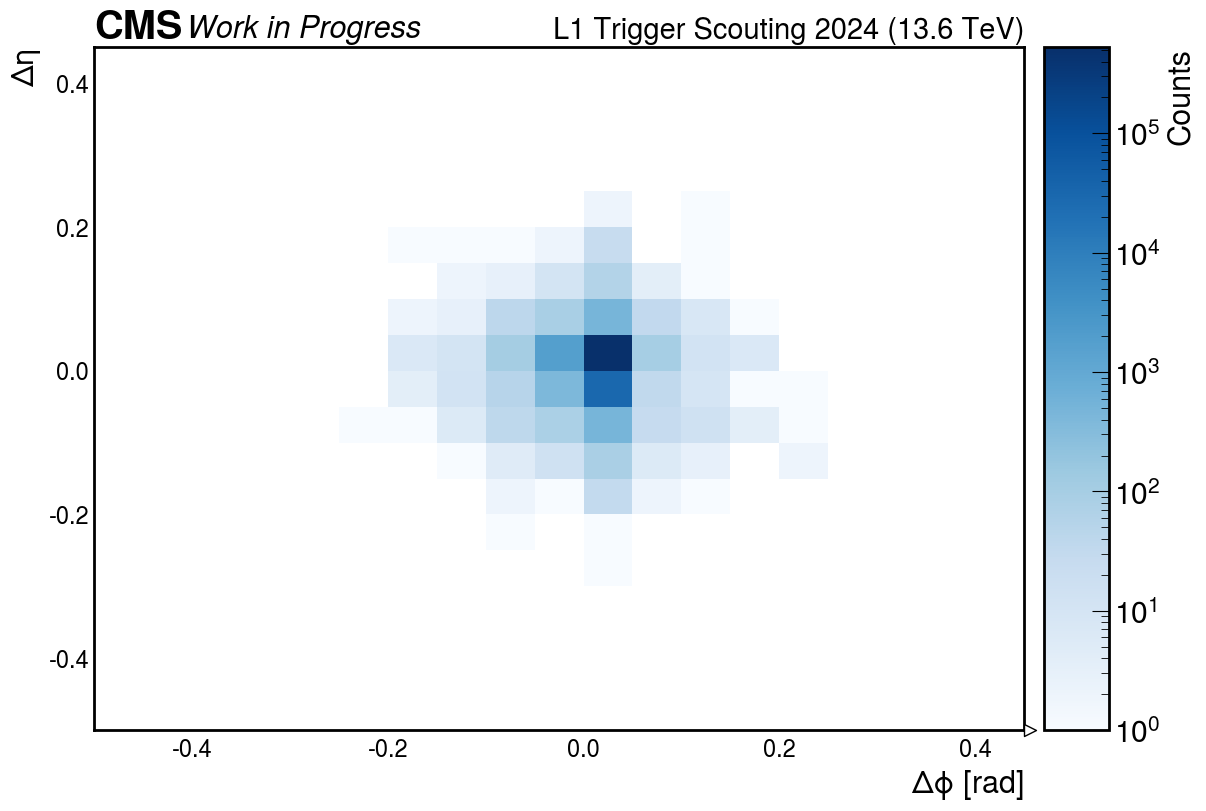

In [20]:
a = 0.5
DeltaPhiRange = np.arange(-a, a, 0.05)
DeltaEtaRange = np.arange(-a, a, 0.05)

hist2d = hist.Hist(
    hist.axis.Variable(DeltaPhiRange, name='Phi'),
    hist.axis.Variable(DeltaEtaRange, name='Eta')

)
hist2d.fill(Phi=DeltaPhi_BMTF_LS306, Eta=DeltaEta_BMTF_LS306)

from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE-2)
draw_grid(ax, axis="y")
draw_cms_label(ax, fontsize=FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

hep.hist2dplot(hist2d, cbar=True, cmap='Blues', ax=ax,  norm = LogNorm())

cbar = ax.collections[0].colorbar
cbar.set_label('Counts', fontsize=FONTSIZE)

ax.set_xlabel(r'$\Delta \phi$ [rad]')
ax.set_ylabel(r'$\Delta \eta$')
ax.grid(False)

ax.tick_params(axis='both', which='both', length=0, labelsize = FONTSIZE - 5)


plt.savefig("../Immagini/BMTFPhiEta.pdf")
plt.savefig("../Immagini/ImmaginiPNG/BMTFPhiEta.png")

plt.show()